# **DATA PREPROCESSING**

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [43]:
data = pd.read_csv('data_cleaned.csv', na_values=['#NAME ?'])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
3,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
4,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [44]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income-group      object
dtype: object

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502927 entries, 0 to 502926
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   age             502927 non-null  int64 
 1   workclass       502927 non-null  object
 2   fnlwgt          502927 non-null  int64 
 3   education       502927 non-null  object
 4   education-num   502927 non-null  int64 
 5   marital-status  502927 non-null  object
 6   occupation      502927 non-null  object
 7   relationship    502927 non-null  object
 8   race            502927 non-null  object
 9   sex             502927 non-null  object
 10  capital-gain    502927 non-null  int64 
 11  capital-loss    502927 non-null  int64 
 12  hours-per-week  502927 non-null  int64 
 13  native-country  502927 non-null  object
 14  income-group    502927 non-null  object
dtypes: int64(6), object(9)
memory usage: 57.6+ MB


In [46]:
data['income-group'].describe()

count     502927
unique         2
top        <=50K
freq      382954
Name: income-group, dtype: object

In [47]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
data = data.apply(le.fit_transform)

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-group
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
2,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
3,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
4,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0


In [48]:
#get to view our our diagnosis column values are distributed
data['income-group'].value_counts()

0    382954
1    119973
Name: income-group, dtype: int64

# Data Exploration

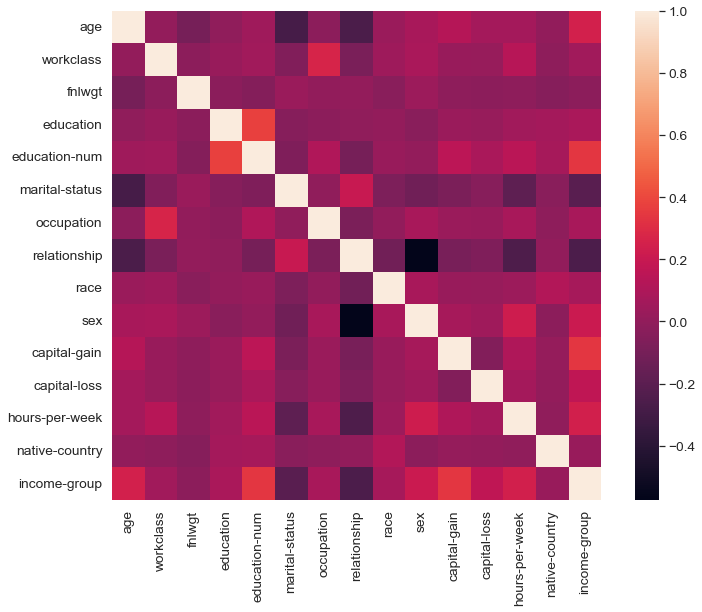

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

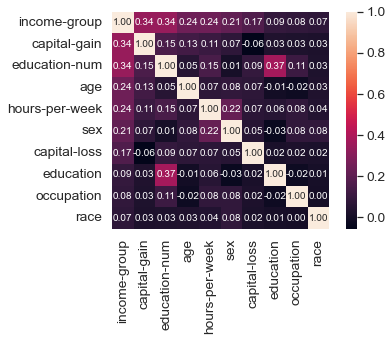

In [50]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'income-group')['income-group'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [51]:
#Remove correlation below 0.1
data.drop('race',axis=1,inplace=True)
data.drop('occupation',axis=1,inplace=True)
data.drop(['education'],axis=1,inplace=True)
data.drop(['capital-loss'],axis=1,inplace=True)
data.head()

,age,workclass,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,native-country,income-group
0,22,7,2671,12,4,1,1,25,39,39,0
1,22,7,2671,12,4,1,1,25,39,39,0
2,22,7,2671,12,4,1,1,25,39,39,0
3,22,7,2671,12,4,1,1,25,39,39,0
4,22,7,2671,12,4,1,1,25,39,39,0


# Prepare train and test dataset

In [52]:
#creating our X feature variables and y outcome variable
#X = data.drop('diagnosis',axis=1)
X = data.drop('income-group',axis=1)
y = data['income-group']

In [53]:
#splitting our data into training and testing data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# **Random Forest Classification**

In [54]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X_train,y_train)


RandomForestClassifier()

In [55]:
#To predict target outcome using the test's set features
clf_pred=clf.predict(X_test)
print(clf_pred)

[1 0 0 ... 1 0 0]


In [56]:
# Transfer the array of predicted popularity of test data into dataframe
clf_pred_df = pd.DataFrame(data=clf_pred, columns=['income-group'])
clf_pred_df.head(10)

,income-group
0,1
1,0
2,0
3,1
4,1
5,0
6,0
7,0
8,0
9,0


In [57]:
RFprob_each = clf.predict_proba(X_test)
RFprob_each

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [58]:
pos_prob = []
for inner in RFprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]


[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [59]:
X_test

,age,workclass,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,native-country
79896,25,4,16452,8,2,0,1,68,47,39
21468,3,4,21059,5,4,3,1,0,39,39
232905,14,4,14251,8,0,1,0,0,31,39
96084,26,4,8799,12,2,5,0,0,34,0
369995,43,5,13707,12,2,0,1,94,39,39
...,...,...,...,...,...,...,...,...,...,...
416810,20,4,12059,10,2,0,1,0,41,39
183954,16,4,20971,1,2,0,1,0,34,26
76102,26,4,5286,8,2,5,0,0,35,32
235744,23,4,14437,7,0,1,1,0,39,39


In [60]:
X_testdf = X_test.copy()
X_testdf.insert(len(X_testdf.columns),'y_test income',y_test)
X_testdf = X_testdf.reset_index(drop=True)
X_testdf

,age,workclass,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,native-country,y_test income
0,25,4,16452,8,2,0,1,68,47,39,1
1,3,4,21059,5,4,3,1,0,39,39,0
2,14,4,14251,8,0,1,0,0,31,39,0
3,26,4,8799,12,2,5,0,0,34,0,1
4,43,5,13707,12,2,0,1,94,39,39,1
...,...,...,...,...,...,...,...,...,...,...,...
100581,20,4,12059,10,2,0,1,0,41,39,1
100582,16,4,20971,1,2,0,1,0,34,26,0
100583,26,4,5286,8,2,5,0,0,35,32,1
100584,23,4,14437,7,0,1,1,0,39,39,0


In [61]:
# Insert result, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'RForest', clf_pred_df['income-group'])
X_testdf

,age,workclass,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,native-country,y_test income,RForest
0,25,4,16452,8,2,0,1,68,47,39,1,1
1,3,4,21059,5,4,3,1,0,39,39,0,0
2,14,4,14251,8,0,1,0,0,31,39,0,0
3,26,4,8799,12,2,5,0,0,34,0,1,1
4,43,5,13707,12,2,0,1,94,39,39,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
100581,20,4,12059,10,2,0,1,0,41,39,1,1
100582,16,4,20971,1,2,0,1,0,34,26,0,0
100583,26,4,5286,8,2,5,0,0,35,32,1,1
100584,23,4,14437,7,0,1,1,0,39,39,0,0


# **Naive Bayes**

In [62]:
from sklearn.naive_bayes import GaussianNB

gaus = GaussianNB()
gaus.fit(X_train, y_train)

GaussianNB()

In [63]:
# To predict target outcome using test set's features
NB_pred= gaus.predict(X_test)
print(NB_pred)

[1 0 0 ... 0 0 0]


In [64]:
# Transfer the array of predicted popularity of test data into dataframe
NB_pred_df = pd.DataFrame(data=NB_pred, columns=['income-group'])
NB_pred_df.head(10)

,income-group
0,1
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [65]:
NBprob_each = gaus.predict_proba(X_test)
NBprob_each

array([[4.12968724e-08, 9.99999959e-01],
       [9.99566168e-01, 4.33832130e-04],
       [9.97462741e-01, 2.53725936e-03],
       ...,
       [9.92295985e-01, 7.70401534e-03],
       [9.67044955e-01, 3.29550447e-02],
       [8.32785420e-01, 1.67214580e-01]])

In [66]:
pos_prob = []
for inner in NBprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]


[0.9999999587031292,
 0.00043383213021728416,
 0.002537259356012804,
 0.009181810581458765,
 1.0,
 0.0998850885399635,
 0.011304610612223823,
 0.030752602911926094,
 0.3030397562221214,
 0.04849391833791416]

In [67]:
# Insert result into test_wtpopl, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'NBGaus', NB_pred_df['income-group'])
X_testdf

,age,workclass,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,native-country,y_test income,RForest,NBGaus
0,25,4,16452,8,2,0,1,68,47,39,1,1,1
1,3,4,21059,5,4,3,1,0,39,39,0,0,0
2,14,4,14251,8,0,1,0,0,31,39,0,0,0
3,26,4,8799,12,2,5,0,0,34,0,1,1,0
4,43,5,13707,12,2,0,1,94,39,39,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100581,20,4,12059,10,2,0,1,0,41,39,1,1,0
100582,16,4,20971,1,2,0,1,0,34,26,0,0,0
100583,26,4,5286,8,2,5,0,0,35,32,1,1,0
100584,23,4,14437,7,0,1,1,0,39,39,0,0,0


# **KNN Classification**

In [68]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 

# try K=1 through K=15 and record testing accuracy
k_range = range(1, 16)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 16
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

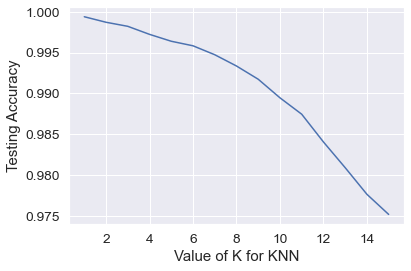

In [69]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [70]:
#Selection of n_neighbours as we do not want to underfit / overfit
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [71]:
# To predict target outcome using test set's features
KNN_pred= knn.predict(X_test)
print(KNN_pred)

[1 0 0 ... 1 0 0]


In [72]:
# Transfer the array of predicted popularity of test data into dataframe
KNpredct_df = pd.DataFrame(data=KNN_pred, columns=['income-group'])
KNpredct_df.head(10)

,income-group
0,1
1,0
2,0
3,1
4,1
5,0
6,0
7,0
8,0
9,0


In [73]:
KNprob_each = knn.predict_proba(X_test)
KNprob_each

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [74]:
pos_prob = []
for inner in KNprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]

[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [75]:
# Insert result, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'KNeigh', KNpredct_df['income-group'])
X_testdf


,age,workclass,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,native-country,y_test income,RForest,NBGaus,KNeigh
0,25,4,16452,8,2,0,1,68,47,39,1,1,1,1
1,3,4,21059,5,4,3,1,0,39,39,0,0,0,0
2,14,4,14251,8,0,1,0,0,31,39,0,0,0,0
3,26,4,8799,12,2,5,0,0,34,0,1,1,0,1
4,43,5,13707,12,2,0,1,94,39,39,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100581,20,4,12059,10,2,0,1,0,41,39,1,1,0,1
100582,16,4,20971,1,2,0,1,0,34,26,0,0,0,0
100583,26,4,5286,8,2,5,0,0,35,32,1,1,0,1
100584,23,4,14437,7,0,1,1,0,39,39,0,0,0,0


# **Decision Tree**

In [76]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [77]:
#To predict target outcome using the test's set features
model_pred=model.predict(X_test)
print(model_pred)

[1 0 0 ... 1 0 0]


In [78]:
# Transfer the array of predicted popularity of test data into dataframe
model_pred_df = pd.DataFrame(data=model_pred, columns=['income-group'])
model_pred_df.head(10)

,income-group
0,1
1,0
2,0
3,1
4,1
5,0
6,0
7,0
8,0
9,0


In [79]:
DTprob_each = model.predict_proba(X_test)
DTprob_each

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [80]:
pos_prob = []
for inner in DTprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]


[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [81]:
# Insert result, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'DecisionT', clf_pred_df['income-group'])
X_testdf


,age,workclass,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,native-country,y_test income,RForest,NBGaus,KNeigh,DecisionT
0,25,4,16452,8,2,0,1,68,47,39,1,1,1,1,1
1,3,4,21059,5,4,3,1,0,39,39,0,0,0,0,0
2,14,4,14251,8,0,1,0,0,31,39,0,0,0,0,0
3,26,4,8799,12,2,5,0,0,34,0,1,1,0,1,1
4,43,5,13707,12,2,0,1,94,39,39,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100581,20,4,12059,10,2,0,1,0,41,39,1,1,0,1,1
100582,16,4,20971,1,2,0,1,0,34,26,0,0,0,0,0
100583,26,4,5286,8,2,5,0,0,35,32,1,1,0,1,1
100584,23,4,14437,7,0,1,1,0,39,39,0,0,0,0,0


# **Evaluation for Classifiers**

In [82]:
#Import relevant metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [83]:
#RANDOM FOREST
acRF=accuracy_score(y_test,clf_pred)
fscoreRF=f1_score(y_test,clf_pred)
conmatrixRF = confusion_matrix(y_test,clf_pred)

#NAIVE BAYES
acNB=accuracy_score(y_test,NB_pred)
fscoreNB = f1_score(y_test,NB_pred)
conmatrixNB = confusion_matrix(y_test,NB_pred)

#K NEIGHBOURS
acKNN=accuracy_score(y_test,KNN_pred)
fscoreKNN=f1_score(y_test,KNN_pred)
conmatrixKNN = confusion_matrix(y_test,KNN_pred)

#DECISION TREE
acDTree = accuracy_score(y_test,model_pred)
fscoreDTree = f1_score(y_test,model_pred)
conmatrixDTree = confusion_matrix(y_test,model_pred)


In [84]:
df = pd.DataFrame(
    {
        "KNeigh": [acKNN, fscoreKNN, conmatrixKNN],
        "Naive Bayes": [acNB, fscoreNB, conmatrixNB],
        "Random Forest": [acRF, fscoreRF, conmatrixRF],
        "Decision Tree": [acDTree, fscoreDTree, conmatrixDTree]
    },
    columns=["KNeigh", "Naive Bayes", "Random Forest", "Decision Tree"],
    index = ["Accuracy", "Fscore", "Confusion Matrix"])
df



,KNeigh,Naive Bayes,Random Forest,Decision Tree
Accuracy,0.995834,0.827391,0.999374,0.999403
Fscore,0.991259,0.576908,0.99869,0.998753
Confusion Matrix,"[[76410, 105], [314, 23757]]","[[71387, 5128], [12234, 11837]]","[[76503, 12], [51, 24020]]","[[76503, 12], [48, 24023]]"
